In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential,Input,Model

In [ ]:
class_names = ['cycling','dancing','eating','hugging','sleeping','running']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [ ]:
root_path1 = '/content/drive/MyDrive/Dataset/action_net_v1/train/cycling'
root_path2 = '/content/drive/MyDrive/Dataset/action_net_v1/train/dancing'
root_path3 = '/content/drive/MyDrive/Dataset/action_net_v1/train/eating'
root_path4 = '/content/drive/MyDrive/Dataset/action_net_v1/train/hugging'
root_path5 = '/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping'
root_path6 = '/content/drive/MyDrive/Dataset/action_net_v1/train/running'

In [ ]:
root_path11 = '/content/drive/MyDrive/Dataset/action_net_v1/test/cycling'
root_path22 = '/content/drive/MyDrive/Dataset/action_net_v1/test/dancing'
root_path33 = '/content/drive/MyDrive/Dataset/action_net_v1/test/eating'
root_path44 = '/content/drive/MyDrive/Dataset/action_net_v1/test/hugging'
root_path55 = '/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping'
root_path66 = '/content/drive/MyDrive/Dataset/action_net_v1/test/running'

In [ ]:
data_list=[]
labels_list=[]

In [ ]:
for i in os.listdir(root_path1):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("cycling")

In [ ]:
for i in os.listdir(root_path2):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("dancing")

In [ ]:
for i in os.listdir(root_path3):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("eating")

In [ ]:
for i in os.listdir(root_path4):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("hugging")

In [ ]:
for i in os.listdir(root_path5):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("sleeping")

In [ ]:
for i in os.listdir(root_path6):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/train/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list.append(img)
        labels_list.append("running")

In [ ]:
data = np.array(data_list)

In [ ]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels= my_label.fit_transform(labels_list)

In [ ]:
data_list1=[]
labels_list1=[]

In [ ]:
for i in os.listdir(root_path11):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/cycling", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("cycling")

In [ ]:
for i in os.listdir(root_path22):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/dancing", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("dancing")

In [ ]:
for i in os.listdir(root_path33):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/eating", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("eating")

In [ ]:
for i in os.listdir(root_path44):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/hugging", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("hugging")

In [ ]:
for i in os.listdir(root_path55):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/sleeping", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("sleeping")

In [ ]:
for i in os.listdir(root_path66):
        img_path=os.path.join("/content/drive/MyDrive/Dataset/action_net_v1/test/running", i)
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img = np.array(img)
        data_list1.append(img)
        labels_list1.append("running")

In [ ]:
data1 = np.array(data_list1)

In [ ]:
from sklearn import preprocessing 
my_label = preprocessing.LabelEncoder()   
labels1= my_label.fit_transform(labels_list1)

In [ ]:
train_images, train_labels = shuffle(data, labels, random_state=25)

In [ ]:
test_images, test_labels = shuffle(data1, labels1, random_state=25)

In [ ]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]
print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 6000
Number of testing examples: 1200
Each image is of size: (150, 150)


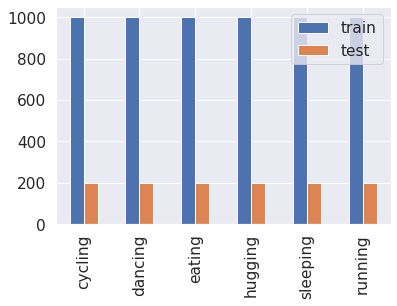

In [ ]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

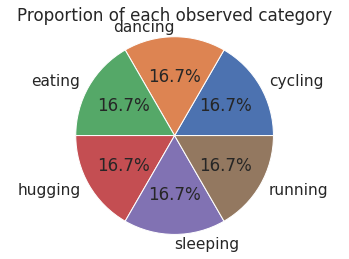

In [ ]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [ ]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [ ]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

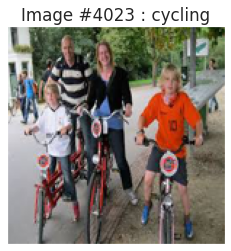

In [ ]:
display_random_image(class_names, train_images, train_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
38/38 [==============================] - 17s 151ms/step - loss: 1.9806 - accuracy: 0.2656 - val_loss: 1.5129 - val_accuracy: 0.4025
Epoch 2/20
38/38 [==============================] - 4s 119ms/step - loss: 1.3352 - accuracy: 0.5052 - val_loss: 1.2638 - val_accuracy: 0.5392
Epoch 3/20
38/38 [==============================] - 4s 114ms/step - loss: 1.0384 - accuracy: 0.6310 - val_loss: 1.2686 - val_accuracy: 0.5400
Epoch 4/20
38/38 [==============================] - 4s 113ms/step - loss: 0.7889 - accuracy: 0.7242 - val_loss: 1.1732 - val_accuracy: 0.5642
Epoch 5/20
38/38 [==============================] - 4s 113ms/step - loss: 0.5537 - accuracy: 0.8183 - val_loss: 1.2485 - val_accuracy: 0.5667
Epoch 6/20
38/38 [==============================] - 4s 113ms/step - loss: 0.3453 - accuracy: 0.9013 - val_loss: 1.3182 - val_accuracy: 0.5783
Epoch 7/20
38/38 [==============================] - 4s 113ms/step - loss: 0.2235 - accuracy: 0.9423 - val_loss: 1.4593 - val_accuracy: 0.5950
Epoch

In [ ]:
train_loss = model.evaluate(train_images, train_labels)

188/188 [==============================] - 3s 15ms/step - loss: 0.5097 - accuracy: 0.9160


In [ ]:
test_loss = model.evaluate(test_images, test_labels)

38/38 [==============================] - 1s 14ms/step - loss: 3.0912 - accuracy: 0.5292


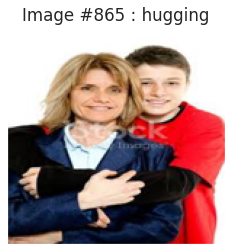

In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [ ]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(train_images, train_labels, epochs=1) # Run with 1 epoch to speed things up for demo purposes
  _, accuracy = model.evaluate(test_images, test_labels)
  return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [ ]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'adam'}
38/38 [==============================] - 1s 14ms/step - loss: 1.4522 - accuracy: 0.4467
--- Starting trial: run-1
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'sgd'}


In [ ]:
%tensorboard --logdir logs/hparam_tuning